In [1]:
from langgraph.graph import Graph

In [2]:
from langchain_groq import ChatGroq

In [3]:
llm=ChatGroq(model="llama-3.3-70b-versatile")

In [5]:
llm.invoke("What is the capital of France?").content

'The capital of France is Paris.'

In [7]:
def function_input(input):
    llm=ChatGroq(model="llama-3.3-70b-versatile")
    response=llm.invoke(input).content
    return response

function_input("What is the capital of India?")

'The capital of India is New Delhi.'

In [9]:
def function2(input):
    upper_string=input.upper()
    return upper_string

function2("Whats the capital of India?")

'WHATS THE CAPITAL OF INDIA?'

In [10]:
workflow=Graph()

In [11]:
workflow.add_node("llm",function_input)
workflow.add_node("upper",function2)

In [12]:
workflow.add_edge("llm","upper")

In [13]:
workflow.set_entry_point("llm")

In [14]:
workflow.set_finish_point("upper")

In [15]:
app=workflow.compile()

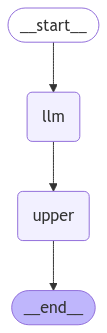

In [16]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [19]:
app.invoke("Who is the president of USA?")

'AS OF MY KNOWLEDGE CUTOFF IN 2023, THE PRESIDENT OF THE UNITED STATES IS JOE BIDEN. HOWEVER, PLEASE NOTE THAT MY INFORMATION MAY NOT BE UP-TO-DATE, AND I RECOMMEND CHECKING WITH A RELIABLE NEWS SOURCE FOR THE MOST CURRENT INFORMATION.'